# Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split

In [ ]:
train_data = pd.read_excel("/content/drive/MyDrive/Resolute_internship_Assignment/Task_1_2_ML/Task1and2_ML/train.xlsx")
test_data = pd.read_excel("/content/drive/MyDrive/Resolute_internship_Assignment/Task_1_2_ML/Task1and2_ML/test.xlsx")

In [ ]:
train_data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [ ]:
classes = pd.unique(train_data.iloc[:,-1])

In [ ]:
classes

array(['B37', 'B61', 'A19', 'A22', 'A33', 'A75', 'A41', 'B14', 'B80',
       'B64', 'A1', 'B21', 'A70', 'B57', 'B9', 'B50', 'B31', 'A21', 'B30',
       'A4', 'B40', 'B6', 'A64', 'A25', 'B18', 'A66', 'A53', 'B73', 'A50',
       'B25', 'A29', 'A35', 'A3', 'A46', 'B45', 'A36', 'B5', 'A79', 'A32',
       'B23', 'A7', 'A62', 'A71', 'A58', 'A9', 'B63', 'B51', 'B8', 'B36',
       'A14', 'A15', 'A24', 'B38', 'A10', 'B4', 'A37', 'A12', 'B41',
       'A17', 'B49', 'B71', 'B59', 'B39', 'B29', 'A76', 'B58', 'B28',
       'A77', 'A67', 'B24', 'A31', 'A34', 'A5', 'B34', 'A11', 'B16',
       'B20', 'A63', 'B53', 'A73', 'A44', 'A69', 'A56', 'A54', 'A55',
       'B11', 'A42', 'B22', 'B67', 'A74', 'A57', 'A8', 'B46', 'B15',
       'A51', 'A40', 'A59', 'A72', 'B32', 'A2', 'A13', 'B17', 'A65',
       'A52', 'A47', 'B47', 'B77', 'B3', 'B35', 'B44', 'A80', 'B43',
       'B54', 'B75', 'A49', 'B52', 'B33', 'B2', 'B1', 'A39', 'B7', 'A20',
       'A18', 'B12', 'A27', 'A6', 'A68', 'B72', 'B66', 'B69', 'A26',
   

In [ ]:
classes.size

160

There are 160 different classes

In [ ]:
X_train = train_data.iloc[: , :-1].values
y_train = train_data.iloc[: ,-1].values


In [ ]:
X_train

array([[-70, -61, -66, ..., -75, -63, -77],
       [-77, -74, -71, ..., -63, -53, -63],
       [-53, -38, -55, ..., -60, -68, -77],
       ...,
       [-42, -58, -72, ..., -70, -75, -74],
       [-50, -50, -70, ..., -74, -72, -81],
       [-66, -64, -70, ..., -61, -67, -65]])

In [ ]:
test_data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69


In [ ]:
y_train

array(['B37', 'B61', 'A19', ..., 'A6', 'B2', 'B45'], dtype=object)

In [ ]:
print(X_train.shape,y_train.shape)

(36752, 18) (36752,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
y_train_data = le.fit_transform(y_train)

In [ ]:
y_train_data.max()

159

In [ ]:
y_train_data[:10]

array([110, 137,  10,  14,  26,  72,  35,  85, 158,  26])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train_data = scaler.fit_transform(X_train)
X_test_data = scaler.fit_transform(test_data)
print(X_train_data.shape)

(36752, 18)


In [ ]:
X_train_data

array([[-0.47321406,  0.39508167, -0.17481688, ..., -1.03062689,
         0.28899656, -0.98195758],
       [-1.27438905, -1.06322685, -0.78798229, ...,  0.10784997,
         1.28186418,  0.33869147],
       [ 1.47249662,  2.97516597,  1.17414703, ...,  0.39246918,
        -0.20743726, -0.98195758],
       ...,
       [ 2.73148589,  0.7316144 , -0.91061537, ..., -0.55626153,
        -0.90244459, -0.69896135],
       [ 1.81585733,  1.62903503, -0.6653492 , ..., -0.93575382,
        -0.60458431, -1.35928588],
       [-0.01539979,  0.05854893, -0.6653492 , ...,  0.29759611,
        -0.10815049,  0.15002732]])

In [ ]:
train_df = pd.DataFrame({'class': y_train_data})

Checking if dataset is Balanced or not?

In [ ]:
import seaborn as sns

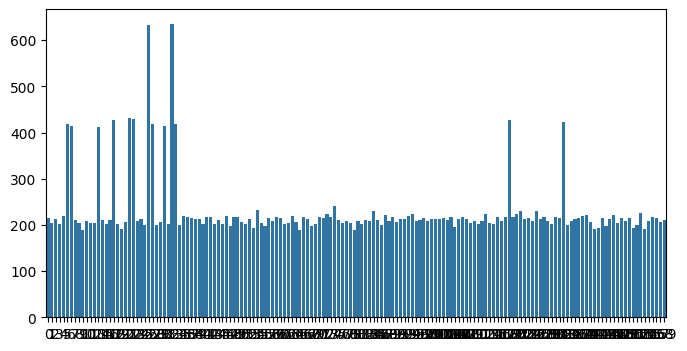

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
idx , c = np.unique(y_train_data,return_counts=True)
sns.barplot(x=idx,y=c,ax=ax)
plt.show()

In [ ]:

train_class_counts = train_df['class'].value_counts()
train_class_percentages = train_df['class'].value_counts(normalize=True) * 100

print("Training Set Class Distribution:")
print(train_class_counts)
print("\nTraining Set Class Percentages:")
print(train_class_percentages)

Training Set Class Distribution:
class
32     635
26     633
21     432
22     429
119    428
      ... 
19     191
141    191
65     190
9      189
79     188
Name: count, Length: 160, dtype: int64

Training Set Class Percentages:
class
32     1.727797
26     1.722355
21     1.175446
22     1.167283
119    1.164562
         ...   
19     0.519700
141    0.519700
65     0.516979
9      0.514258
79     0.511537
Name: proportion, Length: 160, dtype: float64


**By analysing we find dataset is unbalanced..**
Only 2 values of 44th class , but 492 values for 22nd class

To handle imbalance we will use the weight parameter in the CrossEntropyLoss function, for that we will need frequency of parameters

And also SMOTE for dealing with imbalanced data

In [ ]:
print(train_class_counts)

class
32     635
26     633
21     432
22     429
119    428
      ... 
19     191
141    191
65     190
9      189
79     188
Name: count, Length: 160, dtype: int64


In [ ]:
np.max(train_class_counts)

635

In [ ]:
np.argmax(train_class_counts)

0

Dataset is widely biased towards zeroeth class. If not treated, this will cause problems later..

But first, we will apply well-known models for unbalanced multiclass classification.

# Classification using RandomForestClassifier

In [ ]:
X_train_RFC, X_test_RFC, y_train_RFC, y_test_RFC = train_test_split(X_train_data, y_train_data, test_size=0.2, random_state=42, stratify=y_train_data)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_RFC, y_train_RFC)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
y_train_data

array([110, 137,  10, ...,  55,  91, 119])

In [ ]:
le.classes_

array(['A1', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
       'A18', 'A19', 'A2', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25',
       'A26', 'A27', 'A28', 'A29', 'A3', 'A30', 'A31', 'A32', 'A33',
       'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A4', 'A40', 'A41',
       'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A5',
       'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58',
       'A59', 'A6', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66',
       'A67', 'A68', 'A69', 'A7', 'A70', 'A71', 'A72', 'A73', 'A74',
       'A75', 'A76', 'A77', 'A78', 'A79', 'A8', 'A80', 'A9', 'B1', 'B10',
       'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19',
       'B2', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27',
       'B28', 'B29', 'B3', 'B30', 'B31', 'B32', 'B33', 'B34', 'B35',
       'B36', 'B37', 'B38', 'B39', 'B4', 'B40', 'B41', 'B42', 'B43',
       'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B5', 'B50', 'B51',
       'B52', 'B53', 'B54',

In [ ]:
y_pred_RFC = clf.predict(X_test_RFC)

print(f"Accuracy: {accuracy_score(y_test_RFC, y_pred_RFC)}")
print(classification_report(y_test_RFC, y_pred_RFC, target_names=le.classes_))

Accuracy: 0.9881648755271392
              precision    recall  f1-score   support

          A1       0.95      0.95      0.95        43
         A10       0.93      0.95      0.94        41
         A11       1.00      1.00      1.00        42
         A12       1.00      1.00      1.00        41
         A13       1.00      1.00      1.00        44
         A14       0.99      1.00      0.99        84
         A15       1.00      1.00      1.00        83
         A16       1.00      1.00      1.00        42
         A17       0.95      0.95      0.95        41
         A18       1.00      1.00      1.00        38
         A19       1.00      1.00      1.00        42
          A2       1.00      1.00      1.00        41
         A20       1.00      1.00      1.00        41
         A21       0.98      1.00      0.99        82
         A22       1.00      1.00      1.00        42
         A23       1.00      1.00      1.00        40
         A24       1.00      1.00      1.00        4

In [ ]:
y_pred_RFC

array([137, 150,  11, ...,  63, 133,  30])

Prediction for validation dataset, which is splitted from training dataset. (Not the test dataset, that is shown later)

# Classification using Xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=160, random_state=42)


xgb_classifier.fit(X_train_RFC, y_train_RFC)


y_pred_Xg = xgb_classifier.predict(X_test_RFC)
print("Validation Accuracy:", accuracy_score(y_test_RFC, y_pred_Xg))
print(classification_report(y_test_RFC, y_pred_Xg))


Validation Accuracy: 0.9804108284587131
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.93      0.95      0.94        41
           2       1.00      0.98      0.99        42
           3       0.98      1.00      0.99        41
           4       1.00      1.00      1.00        44
           5       0.99      1.00      0.99        84
           6       0.98      0.96      0.97        83
           7       1.00      0.98      0.99        42
           8       1.00      0.90      0.95        41
           9       1.00      1.00      1.00        38
          10       1.00      1.00      1.00        42
          11       1.00      1.00      1.00        41
          12       1.00      1.00      1.00        41
          13       0.94      0.95      0.95        82
          14       1.00      1.00      1.00        42
          15       1.00      1.00      1.00        40
          16       1.00      1.00      1.

Prediction for validation dataset, which is splitted from training dataset. (Not the test dataset, that is shown later)

# Using SMOTE and defining weight parameter for cross entropy loss

As our dataset is unbalanced, in order to perform training using neural networks, we will have to handle the imbalance.
So, we are using SMOTE library here and also using weights parameter for cross entropy loss.

In [ ]:
# calculating weights tensor for CrossEntropyLoss
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_data), y=y_train_data)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_data, y_train_data)

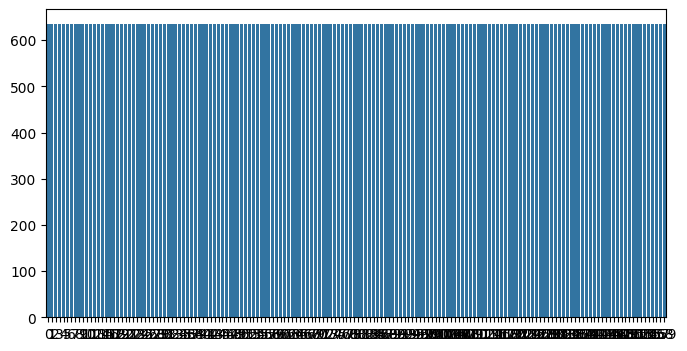

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
idx , c = np.unique(y_train_resampled,return_counts=True)
sns.barplot(x=idx,y=c,ax=ax)
plt.show()

In [ ]:
X_train_resampled.shape

(101600, 18)

In [ ]:
y_train_resampled.shape

(101600,)

Thus, Unbalance is dealt with by SMOTE

# Splitting data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)

In [ ]:
print(X_train_split.shape,y_train_split.shape)

(81280, 18) (81280,)


# Classification using Pytorch layers

In [ ]:
import torch

In [ ]:
X_train_tensor = torch.tensor(X_train_split, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_split, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_split, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_split, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_data, dtype=torch.float32)

In [ ]:
X_test_tensor.shape

torch.Size([15752, 18])

In [ ]:
X_train_tensor.shape

torch.Size([81280, 18])

In [ ]:
X_train_tensor

tensor([[ 1.2436,  0.9560,  0.2648,  ..., -2.9281, -0.0501, -0.0778],
        [ 0.2135, -0.5023, -0.0522,  ..., -0.0819, -0.4060, -1.2650],
        [-1.4705, -0.5184, -0.2799,  ...,  0.1078, -0.0231, -0.2138],
        ...,
        [ 1.7014, -0.1658, -1.4011,  ..., -0.0819, -1.6967, -0.8876],
        [-1.7236, -0.5023, -0.2882,  ...,  0.1078, -0.2992,  0.0486],
        [-1.4419,  0.2829,  0.4383,  ...,  0.2976, -0.2074, -0.3654]])

In [ ]:
X_train_tensor.shape

torch.Size([81280, 18])

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [ ]:
# 1 hidden layer : 128 64, Nonlinearity introduced by ReLU and Dropout used to prevent overfitting

In [ ]:
class classification_NN(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 18,out_features=128)
    self.layer2 = nn.Linear(in_features = 128,out_features=64)
    self.layer3 = nn.Linear(in_features = 64,out_features=160)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.5)

  def forward(self,x):
    x = self.relu(self.layer1(x))
    x = self.dropout(x)
    x = self.relu(self.layer2(x))
    x = self.dropout(x)
    x = self.layer3(x)
    return x

In [ ]:
# pip install torch-summary

In [ ]:
model_1 = classification_NN()

In [ ]:
from torchsummary import summary
summary(model_1)

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            2,432
├─Linear: 1-2                            8,256
├─Linear: 1-3                            10,400
├─ReLU: 1-4                              --
├─Dropout: 1-5                           --
Total params: 21,088
Trainable params: 21,088
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            2,432
├─Linear: 1-2                            8,256
├─Linear: 1-3                            10,400
├─ReLU: 1-4                              --
├─Dropout: 1-5                           --
Total params: 21,088
Trainable params: 21,088
Non-trainable params: 0

In [ ]:
with torch.inference_mode():
  y_logit = model_1(X_train_tensor)

In [ ]:
y_logit

tensor([[ 0.0519,  0.0621, -0.0589,  ...,  0.0101,  0.0281,  0.0321],
        [-0.0120, -0.0711, -0.0477,  ...,  0.0894,  0.0547, -0.0521],
        [-0.0162, -0.1096, -0.1698,  ...,  0.0482,  0.1113, -0.0387],
        ...,
        [ 0.0886, -0.0155, -0.0170,  ...,  0.0738,  0.0460, -0.0401],
        [-0.0084, -0.1074, -0.1816,  ...,  0.0453,  0.1134, -0.0332],
        [ 0.0125, -0.0478, -0.0760,  ...,  0.0545,  0.0210, -0.0305]])

We want to make logits and original labelled data of same shape and introduce nonlinearity, so that shape error does not occur while calculating accuracy and loss

In [ ]:
y_preds = torch.softmax(y_logit,dim=1)
y_preds = torch.argmax(y_preds,dim=1)

In [ ]:
y_preds

tensor([ 43,  87, 109,  ...,  43,  16,  83])

In [ ]:
lossfn = nn.CrossEntropyLoss(weight = class_weights_tensor)
# optimizer = optim.Adam(
#     [
#         {"params": model_1.layer1.parameters(), "lr": 0.001},
#         {"params": model_1.layer2.parameters(),"lr": 0.01},
#         {"params": model_1.layer3.parameters(), "lr": 0.1},
#     ],
#     lr=0.01,
# )
# Tried this did not work

optimizer = optim.Adam(model_1.parameters(),lr = 0.01)

Adam optimizer works best for this dataset , SGD does not seem to work

In [ ]:
# Training loop
epochs = 300
for epoch in range(epochs):
  model_1.train()
  y_logit = model_1(X_train_tensor)
  y_preds = torch.softmax(y_logit,dim=1)
  y_preds = torch.argmax(y_preds,dim=1)
  loss = lossfn(y_logit,y_train_tensor)
  acc = accuracy_score(y_true = y_train_tensor,y_pred = y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    val_logits = model_1(X_val_tensor)
    val_preds = torch.softmax(val_logits,dim=1)
    val_preds = torch.argmax(val_preds,dim=1)
    val_loss = lossfn(val_logits,y_val_tensor)
    val_acc = accuracy_score(y_true = y_val_tensor,y_pred = val_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f} | Val loss: {val_loss:.5f}, Val acc: {val_acc:.2f}")




Epoch: 0 | Loss: 5.09447, Accuracy: 0.01 | Val loss: 4.98305, Val acc: 0.06
Epoch: 10 | Loss: 3.16860, Accuracy: 0.20 | Val loss: 2.29595, Val acc: 0.76
Epoch: 20 | Loss: 1.61945, Accuracy: 0.53 | Val loss: 0.56942, Val acc: 0.91
Epoch: 30 | Loss: 1.01472, Accuracy: 0.70 | Val loss: 0.24993, Val acc: 0.95
Epoch: 40 | Loss: 0.79769, Accuracy: 0.76 | Val loss: 0.17134, Val acc: 0.95
Epoch: 50 | Loss: 0.68013, Accuracy: 0.79 | Val loss: 0.13614, Val acc: 0.96
Epoch: 60 | Loss: 0.60423, Accuracy: 0.81 | Val loss: 0.11889, Val acc: 0.96
Epoch: 70 | Loss: 0.55818, Accuracy: 0.83 | Val loss: 0.10811, Val acc: 0.96
Epoch: 80 | Loss: 0.52273, Accuracy: 0.84 | Val loss: 0.09976, Val acc: 0.97
Epoch: 90 | Loss: 0.50111, Accuracy: 0.85 | Val loss: 0.09450, Val acc: 0.97
Epoch: 100 | Loss: 0.48004, Accuracy: 0.85 | Val loss: 0.09024, Val acc: 0.97
Epoch: 110 | Loss: 0.45417, Accuracy: 0.86 | Val loss: 0.08698, Val acc: 0.97
Epoch: 120 | Loss: 0.43822, Accuracy: 0.86 | Val loss: 0.08429, Val acc: 0.

Thus, Model_1 was trained on training accuracy= 90%
ans Validation_accuracy = 98%

To increase training accuracy more, number of layers in Model Architecture , can be increased

F1 score, Precision and Recall evaluation metrics can also be used. But as dataset is made balanced by SMOTE. I am using plain accuracy.

Adam was observed to be more efficient than SGD
Best accuracy was obtained at lr = 0.01

In [ ]:
val_preds.shape

torch.Size([20320])

In [ ]:
print(y_val_tensor)

tensor([138,  26,  22,  ..., 123,   6,  29])


In [ ]:
print(val_preds)

tensor([138,  26,  22,  ..., 123,   6,  29])


In [ ]:
for i in range(200):
  if(y_val_tensor[i]== val_preds[i]):
    print("true")
  else:
    print("false")


true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
false
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
false
true
true
true
true
true
true
true
false
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
false
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
t

Model_1 predicts almost all values perfectly

# Saving Model_1

In [ ]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = 'model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
torch.save({
    'model_state_dict': model_1.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}, MODEL_SAVE_PATH)


# Testing on test.xlsx file and merging output column on it

In [ ]:
with torch.inference_mode():
    test_logits = model_1(X_test_tensor)
    test_preds = torch.softmax(test_logits,dim=1)
    test_preds = torch.argmax(test_preds,dim=1)

In [ ]:
test_preds

tensor([151,   1, 141,  ..., 145,  31,  78])

In [ ]:
test_data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69


In [ ]:
test_preds.numpy()

array([151,   1, 141, ..., 145,  31,  78])

In [ ]:
out = pd.DataFrame(test_preds.numpy())

In [ ]:
test_data['Model_1_output'] = out

In [ ]:
test_data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,Model_1_output
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60,151
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80,1
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70,141
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65,92
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51,68
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64,82
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54,145
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69,31


In [ ]:

file_name = 'Model_1_Arshan_Shaikh_test_output_resolute_AI.xlsx'

test_data.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


Now , for our remaining 2 well-known models -> randomforest and xgboost predicting test output ...

In [ ]:
y_out_RFC=clf.predict(X_test_data)

In [ ]:
# RandomForest
y_out_RFC


array([151,   1, 141, ..., 145,  31,  78])

In [ ]:
y_RFC = pd.DataFrame(y_out_RFC)
test_data['Random_forest_output'] = y_RFC
file_name = 'Random_Forest_Arshan_Shaikh_test_output_resolute_AI.xlsx'

test_data.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [ ]:
y_out_xg = xgb_classifier.predict(X_test_data)

In [ ]:
# XgBoost
y_out_xg

array([151,   1, 141, ..., 145,  31,  78], dtype=int32)

In [ ]:
y_xg = pd.DataFrame(y_out_xg)
test_data['XG_boost_output'] = y_xg
file_name = 'XG_boost_Arshan_Shaikh_test_output_resolute_AI.xlsx'

test_data.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


**Thus, Complete Analysis and prediction of dataset was done using Pytorch and other python libraries :)**